In [36]:
import json
json_data=open('./out/HomeKitchenCleanBOWSentimentDict.json').read()
HomeKitchenCleanBOWSentimentDict = json.loads(json_data)

# Further analysis on HomeKitchenCleanData for now
# lets get the lengths of all description and reviews in this data
allReviewLengthFrequenciesDict = {}
allDescriptionLengthFrequenciesDict = {}

for asin in HomeKitchenCleanBOWSentimentDict:
    reviewLength = len(HomeKitchenCleanBOWSentimentDict[asin]["Best review"].split())
    descriptionLength = len(HomeKitchenCleanBOWSentimentDict[asin]["description"].split())
    
    if reviewLength in allReviewLengthFrequenciesDict:
        allReviewLengthFrequenciesDict[reviewLength] = allReviewLengthFrequenciesDict[reviewLength] + 1
    else:
        allReviewLengthFrequenciesDict[reviewLength] = 1
        
    if descriptionLength in allDescriptionLengthFrequenciesDict:
        allDescriptionLengthFrequenciesDict[descriptionLength] = allDescriptionLengthFrequenciesDict[descriptionLength] + 1
    else:
        allDescriptionLengthFrequenciesDict[descriptionLength] = 1

print(len(allDescriptionLengthFrequenciesDict),len(allReviewLengthFrequenciesDict))

379 546


In [37]:
minDescLength = min([*allDescriptionLengthFrequenciesDict.keys()])
maxDescLength = max([*allDescriptionLengthFrequenciesDict.keys()])

minRevLength = min([*allReviewLengthFrequenciesDict.keys()])
maxRevLength = max([*allReviewLengthFrequenciesDict.keys()])

print(minDescLength,allDescriptionLengthFrequenciesDict[minDescLength],maxDescLength,allDescriptionLengthFrequenciesDict[maxDescLength])
print(minRevLength,allReviewLengthFrequenciesDict[minRevLength],maxRevLength,allReviewLengthFrequenciesDict[maxRevLength])

1 10 1473 1
5 1 1377 1


In [38]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [39]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from plotly.graph_objs import Figure, Layout, Scatter, Bar
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

In [40]:
descLengths = []
descLengthFreqs = []
for i in range(maxDescLength):
    descLengths.append(i)
    if i in allDescriptionLengthFrequenciesDict and i != 0:
        descLengthFreqs.append(allDescriptionLengthFrequenciesDict[i])
    else:
        descLengthFreqs.append(0)

data = [
        Bar(
            x=descLengths,
            y=descLengthFreqs
        )
]

layout = Layout(
    title='Distribution of product description lengths',
    xaxis=dict(
        title='Description Lengths (No. of words)'
    ),
    yaxis=dict(
        title='Frequency (No. of products in dataset)'
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [41]:
revLengths = []
revLengthFreqs = []
for i in range(maxRevLength):
    revLengths.append(i)
    if i in allReviewLengthFrequenciesDict:
        revLengthFreqs.append(allReviewLengthFrequenciesDict[i])
    else:
        revLengthFreqs.append(0)

data = [
        Bar(
            x=revLengths,
            y=revLengthFreqs
        )
]

layout = Layout(
    title='Distribution of most helpful product review lengths',
    xaxis=dict(
        title='Review Lengths (No. of words)'
    ),
    yaxis=dict(
        title='Frequency (No. of products in dataset)'
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [42]:
# Further analysis on HomeKitchenCleanData for now
# lets get the lengths of all description and reviews in this data
usefulAsins = []

for asin in HomeKitchenCleanBOWSentimentDict:
    reviewLength = len(HomeKitchenCleanBOWSentimentDict[asin]["Best review"].split())
    descriptionLength = len(HomeKitchenCleanBOWSentimentDict[asin]["description"].split())
    
    if reviewLength > 20 and reviewLength < 300 and descriptionLength > 20 and descriptionLength < 300:
        usefulAsins.append(asin)
        

print(len(usefulAsins),len(HomeKitchenCleanBOWSentimentDict), len(usefulAsins)/len(HomeKitchenCleanBOWSentimentDict))

6201 7890 0.7859315589353613


In [43]:
usefulHomeKitchenCleanBOWSentimentDict = {}
for asin in usefulAsins:
    usefulHomeKitchenCleanBOWSentimentDict[asin] = HomeKitchenCleanBOWSentimentDict[asin]

In [44]:
allReviewLengthFrequenciesDict = {}
allDescriptionLengthFrequenciesDict = {}

for asin in usefulHomeKitchenCleanBOWSentimentDict:
    reviewLength = len(usefulHomeKitchenCleanBOWSentimentDict[asin]["Best review"].split())
    descriptionLength = len(usefulHomeKitchenCleanBOWSentimentDict[asin]["description"].split())
    
    if reviewLength in allReviewLengthFrequenciesDict:
        allReviewLengthFrequenciesDict[reviewLength] = allReviewLengthFrequenciesDict[reviewLength] + 1
    else:
        allReviewLengthFrequenciesDict[reviewLength] = 1
        
    if descriptionLength in allDescriptionLengthFrequenciesDict:
        allDescriptionLengthFrequenciesDict[descriptionLength] = allDescriptionLengthFrequenciesDict[descriptionLength] + 1
    else:
        allDescriptionLengthFrequenciesDict[descriptionLength] = 1

print(len(allDescriptionLengthFrequenciesDict),len(allReviewLengthFrequenciesDict))

272 276


In [45]:
descLengths = []
descLengthFreqs = []
for i in range(maxDescLength):
    descLengths.append(i)
    if i in allDescriptionLengthFrequenciesDict and i != 0:
        descLengthFreqs.append(allDescriptionLengthFrequenciesDict[i])
    else:
        descLengthFreqs.append(0)

data = [
        Bar(
            x=descLengths,
            y=descLengthFreqs
        )
]

layout = Layout(
    title='Distribution of product description lengths',
    xaxis=dict(
        title='Description Lengths (No. of words)'
    ),
    yaxis=dict(
        title='Frequency (No. of products in dataset)'
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [46]:
revLengths = []
revLengthFreqs = []
for i in range(maxRevLength):
    revLengths.append(i)
    if i in allReviewLengthFrequenciesDict:
        revLengthFreqs.append(allReviewLengthFrequenciesDict[i])
    else:
        revLengthFreqs.append(0)

data = [
        Bar(
            x=revLengths,
            y=revLengthFreqs
        )
]

layout = Layout(
    title='Distribution of most helpful product review lengths',
    xaxis=dict(
        title='Review Lengths (No. of words)'
    ),
    yaxis=dict(
        title='Frequency (No. of products in dataset)'
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [47]:
[*usefulHomeKitchenCleanBOWSentimentDict.keys()][:10]

['B003BWS9G6',
 'B0018OD8EW',
 'B00124YFHM',
 'B003ISJ4L2',
 'B0000DJ27M',
 'B0029UCW5K',
 'B005M03ER4',
 'B003RWTNY2',
 'B000E7TSBQ',
 'B00066XUOQ']

In [48]:
allAsinSalesRanks = []
for asin in usefulHomeKitchenCleanBOWSentimentDict:
    allAsinSalesRanks.append((asin,usefulHomeKitchenCleanBOWSentimentDict[asin]['salesRank']['Home &amp; Kitchen']))

In [49]:
sortedAllAsinSalesRanks = sorted(allAsinSalesRanks, key=lambda x: x[1])
for asinSalesRankTuple in sortedAllAsinSalesRanks[:10]:
    print(usefulHomeKitchenCleanBOWSentimentDict[asinSalesRankTuple[0]])

{'title': 'simplehuman Wall Mount Grocery Bag Dispenser, Brushed Stainless Steel', 'salesRank': {'Home &amp; Kitchen': 29}, 'Best review': 'This thing works exactly as described. For the past few years, I have just used recycled grocery bags instead of trash bags, and this holder has been perfect for storing them. It mounts anywhere you can stick it or attach two screws, its super easy to stuff from the top, and its just as easy to get a bag out. I have mine mounted on the door below the sink, its very convenient.', 'description': 'Mount this simplehuman grocery bag dispenser on a wall or inside a shelf for convenient, easy access. Stores 30 plastic grocery bags.  Simply tuck them into the top opening, and pull them out from the wide dispensing area on the front of the holder. Durable stainless steel construction. Screws and double-sided tape included.', 'reviewBow': ['thing', 'works', 'exactly', 'described', 'past', 'years', 'used', 'recycled', 'grocery', 'bags', 'instead', 'trash', '

In [50]:
# don't run now
#usefulHomeKitchenCleanBOWSentimentDict
# with open('./out/usefulHomeKitchenCleanBOWSentimentDict.json', 'w') as outfile:
#     json.dump(usefulHomeKitchenCleanBOWSentimentDict, outfile)

In [51]:
# histogram for similar product groups
import json
json_data=open('./out/cleanAsinSimilarProductsPriceBrandImageDict.json').read()
cleanAsinSimilarProductsPriceBrandImageDict = json.loads(json_data)

# Further analysis on HomeKitchenCleanData for now
# lets get the lengths of all description and reviews in this data
allSimilarProductsListLengthFrequenciesDict = {}
goodAsins = []
for asin in cleanAsinSimilarProductsPriceBrandImageDict:
    noOfSimilarProducts = len(cleanAsinSimilarProductsPriceBrandImageDict[asin]["similar"])
    if noOfSimilarProducts == 60:
        goodAsins.append(asin)
#     print(cleanAsinSimilarProductsPriceBrandImageDict[asin]["similar"])
    if noOfSimilarProducts in allSimilarProductsListLengthFrequenciesDict:
        allSimilarProductsListLengthFrequenciesDict[noOfSimilarProducts] = allSimilarProductsListLengthFrequenciesDict[noOfSimilarProducts] + 1
    else:
        allSimilarProductsListLengthFrequenciesDict[noOfSimilarProducts] = 1

# print(allSimilarProductsListLengthFrequenciesDict)


In [52]:
json_data=open('./out/HomeKitchenCleanBOWSentimentPolitenessDict.json').read()
HomeKitchenCleanBOWSentimentPolitenessDict = json.loads(json_data)

In [53]:
sample = []

asin = goodAsins[0]
sample.append(asin)
print("---->",HomeKitchenCleanBOWSentimentPolitenessDict[asin]['title'],HomeKitchenCleanBOWSentimentPolitenessDict[asin]['salesRank'])
i = 0
for asin2 in cleanAsinSimilarProductsPriceBrandImageDict[asin]["similar"]:
    sample.append(asin2)
    i += 1
    print(i,") ",HomeKitchenCleanBOWSentimentPolitenessDict[asin2]['title'],HomeKitchenCleanBOWSentimentPolitenessDict[asin2]['salesRank'])

----> Zenith Products 7446ss Expandable Shower Caddy for Hand Held Shower or Tall Bottles, Chrome {'Home &amp; Kitchen': 2406}
1 )  Zenith Products 7803SS Bathstyles Over-the-Shower Door Caddy, Chrome {'Home &amp; Kitchen': 1257}
2 )  Zenith Products Nickel 3-Piece Bath in a Box, TP Holder and Door Rack, Pearl {'Home &amp; Kitchen': 19798}
3 )  Zenith Products &quot;Cross Style&quot;  Metal Spacesaver, 3 Shelf, Satin Nickel {'Home &amp; Kitchen': 3344}
4 )  Silver CHROME finish rings C hook (with straight rod) Shower Curtain Hooks (12-pk.) {'Home &amp; Kitchen': 10597}
5 )  Zenith Products Pole Caddy, Satin Nickel, 4-Basket L Style {'Home &amp; Kitchen': 6133}
6 )  Shower Caddy Connectors {'Home &amp; Kitchen': 47094}
7 )  Toilet Brush With Holder {'Home &amp; Kitchen': 3527}
8 )  Under Shelf Wrap Rack in WHITE model 1983W from Organize It All {'Home &amp; Kitchen': 15813}
9 )  &quot;Cross Style&quot; Towel Rack, 3 Bars, Satin Nickel {'Home &amp; Kitchen': 13980}
10 )  Sauder Caraway E

In [54]:
similarProductsListLengths = []
similarProductsListLengthFreqs = []
for i in range(max([*allSimilarProductsListLengthFrequenciesDict.keys()])):
    similarProductsListLengths.append(i)
    if i in allSimilarProductsListLengthFrequenciesDict:
        similarProductsListLengthFreqs.append(allSimilarProductsListLengthFrequenciesDict[i])
    else:
        similarProductsListLengthFreqs.append(0)

data = [
        Bar(
            x=similarProductsListLengths,
            y=similarProductsListLengthFreqs
        )
]

layout = Layout(
    title='Distribution of number of similar products',
    xaxis=dict(
        title='No. of similar products (n)'
    ),
    yaxis=dict(
        title='No. of products which have \'n\' similar products'
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [55]:
sampleDict = {}
for asin in sample:
    sampleDict[asin] = HomeKitchenCleanBOWSentimentPolitenessDict[asin]
    sampleDict[asin]['SR'] = HomeKitchenCleanBOWSentimentPolitenessDict[asin]['salesRank']['Home &amp; Kitchen']

In [56]:
import pandas as pd
sampleDf = pd.DataFrame.from_dict(sampleDict, orient='index')

In [57]:
sampleDf.sort_values(by=['SR'])

,description,title,reviewBow,reviewPoliteness,descriptionPoliteness,reviewSentiment,descriptionSentiment,salesRank,descriptionBow,Best review,SR
B007ZF638G,Mount this simplehuman grocery bag dispenser o...,"simplehuman Wall Mount Grocery Bag Dispenser, ...","[thing, works, exactly, described, past, years...",0.962230,0.718649,"{'neg': 0.044, 'neu': 0.619, 'pos': 0.336, 'co...","{'neg': 0.054, 'neu': 0.817, 'pos': 0.128, 'co...",{'Home &amp; Kitchen': 29},"[mount, simplehuman, grocery, bag, dispenser, ...",This thing works exactly as described. For the...,29
B005KC6DY0,This 20 pair shoe rack is made with a durable ...,Whitmor 6780-3139-WHT White Resin 20 Pair Shoe...,"[made, thin, hollow, tubbing, seems, aluminum,...",0.165322,0.451451,"{'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...",{'Home &amp; Kitchen': 136},"[pair, shoe, rack, made, durable, white, resin...",Its made of thin hollow tubbing which seems to...,136
B004I2EONK,This cleaning tool contains an antimicrobial a...,Lysol Bowl Brush with Rim Extension and Caddy,"[short, handle, makes, easier, get, rim, open,...",0.549807,0.246824,"{'neg': 0.17, 'neu': 0.652, 'pos': 0.178, 'com...","{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",{'Home &amp; Kitchen': 189},"[cleaning, tool, contains, antimicrobial, agen...",The short handle makes it easier to get up and...,189
B00004XSF7,Mount this stainless-steel holder by the sink ...,"InterDesign Gia Suction Sink Center, Polished ...","[hold, maybe, bars, stored, vertically, stays,...",0.500000,0.666399,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...","{'neg': 0.036, 'neu': 0.872, 'pos': 0.092, 'co...",{'Home &amp; Kitchen': 204},"[mount, stainlesssteel, holder, sink, wherever...",This will hold 3 maybe 4 bars stored verticall...,204
B000W8AF2S,Grab a piece of paper towel without pulling of...,OXO Good Grips SimplyTear Standing Paper Towel...,"[looked, everywhere, something, gripped, towel...",0.732324,0.500000,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...","{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",{'Home &amp; Kitchen': 352},"[grab, piece, paper, towel, without, pulling, ...",I looked everywhere for something that gripped...,352
B000RGXNM4,"A great alternative to down, this set of two D...","Dream Supreme Plus Gel Fiber-Filled Pillows, S...","[happy, first, order, pillows, much, ordered, ...",0.441374,0.904235,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...","{'neg': 0.065, 'neu': 0.583, 'pos': 0.352, 'co...",{'Home &amp; Kitchen': 425},"[great, alternative, set, two, dream, supreme,...",I was very happy with my first order of these ...,425
B00932UTXE,This shower caddy features ample room to store...,"InterDesign Raphael Shower Caddy, Satin Nickel","[basically, like, design, caddy, soap, holder,...",0.924791,0.398733,"{'neg': 0.062, 'neu': 0.681, 'pos': 0.256, 'co...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'Home &amp; Kitchen': 726},"[shower, caddy, features, ample, room, store, ...",I basically like the design of this caddy. The...,726
B003PGQHRG,Organize your shower or bath with this six poc...,"Maytex Mesh Bath Shower Organizer, White","[easy, hang, wonderful, bath, organizer, bottl...",0.632870,0.491796,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...","{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",{'Home &amp; Kitchen': 737},"[organize, shower, bath, six, pocket, mesh, or...",Easy to hang and a wonderful bath organizer. N...,737
B001UE8ILI,Portable foldable clothes drying rack. Eleven ...,"Whitmor 6023-741 Folding Clothes Drying Rack, ...","[looking, something, dry, small, items, job, l...",0.617124,0.426581,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",{'Home &amp; Kitchen': 752},"[portable, foldable, clothes, drying, rack, el...",I was looking for something to dry small items...,752
B00DH2H5KG,Tired of throwing out a flimsy shower curtain ...,Mildew-Resistant Antibacter

In [58]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

json_data=open('./out/385sampleDict.json').read()
sampleDict = json.loads(json_data)

In [59]:
# plot sales dist.
allSalesFrequenciesDict = {}
allSales = []
for asin in sampleDict:
    sales = sampleDict[asin]['sales']
    allSales.append(sales)
    if sales in allSalesFrequenciesDict:
        allSalesFrequenciesDict[sales] = allSalesFrequenciesDict[sales] + 1
    else:
        allSalesFrequenciesDict[sales] = 1
        
print(len(allSalesFrequenciesDict))

354


In [60]:
x = []
for i in range(len(allSales)):
    x.append(i)

data = [
        Scatter(
            x=x,
            y=sorted(allSales)
        )
]

layout = Layout(
    title='Sales of each product in the similar products bucket',
    xaxis=dict(
        title='Product'
    ),
    yaxis=dict(
        title='No of units sold per month'
    )
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [61]:
sampleDf = pd.DataFrame.from_dict(sampleDict, orient='index')
print(sampleDf.shape)

(385, 401)


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



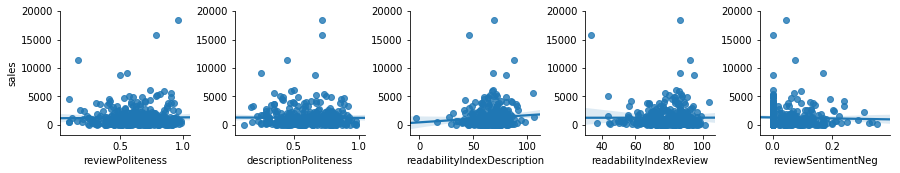

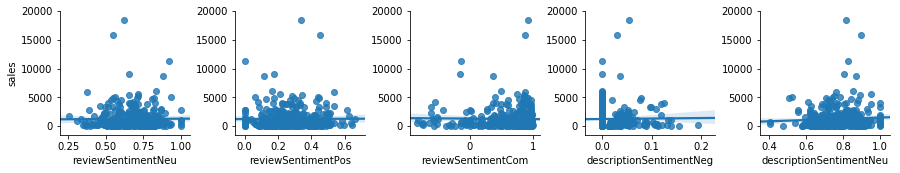

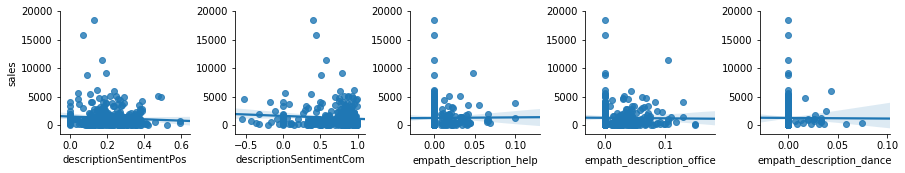

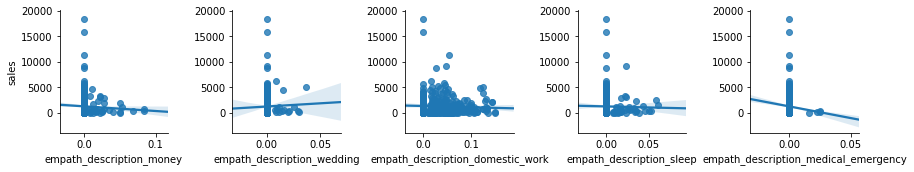

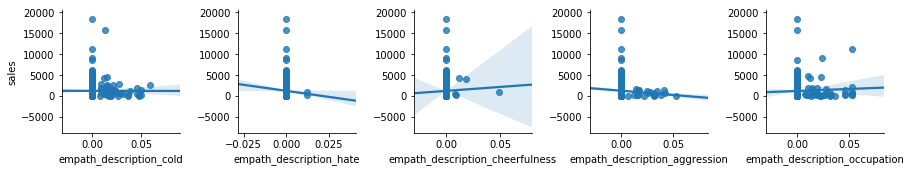

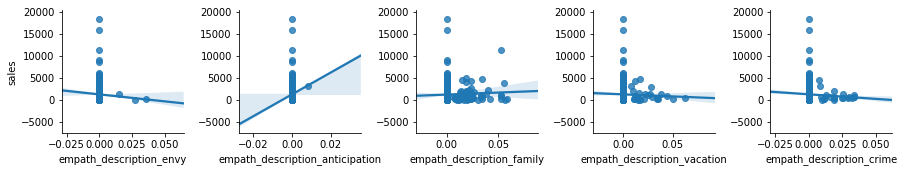

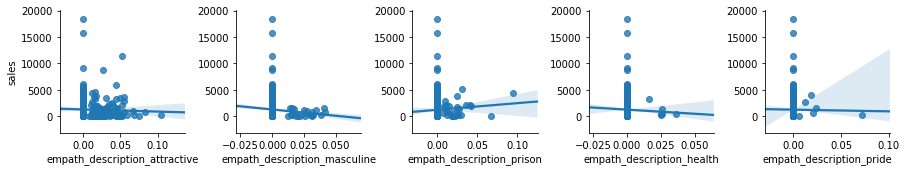

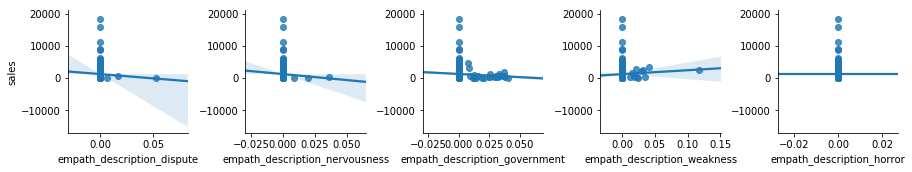

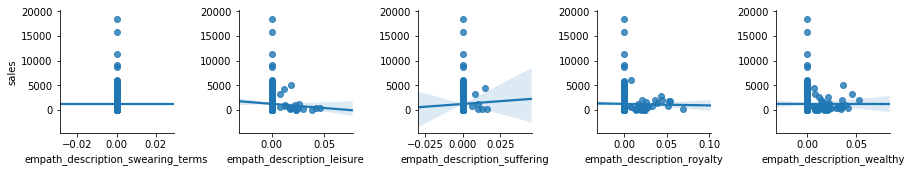

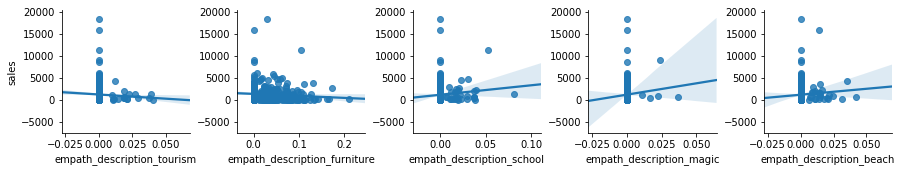

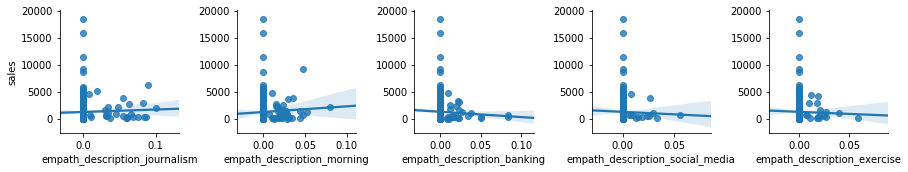

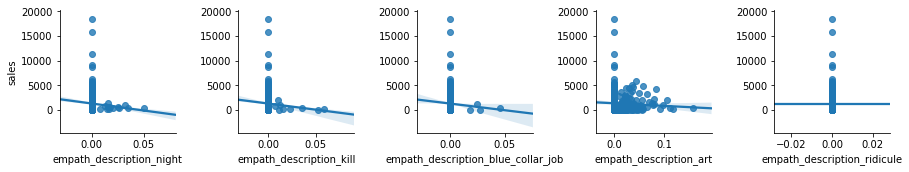

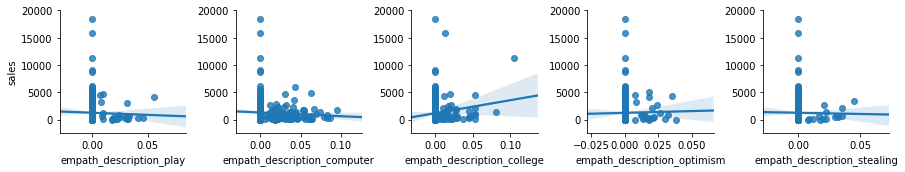

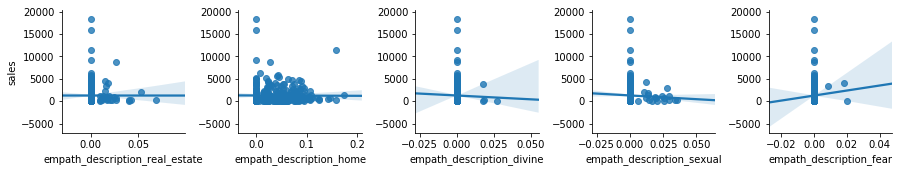

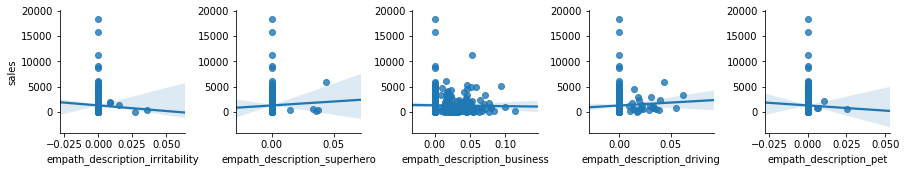

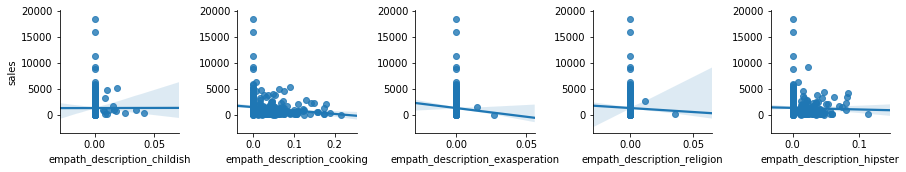

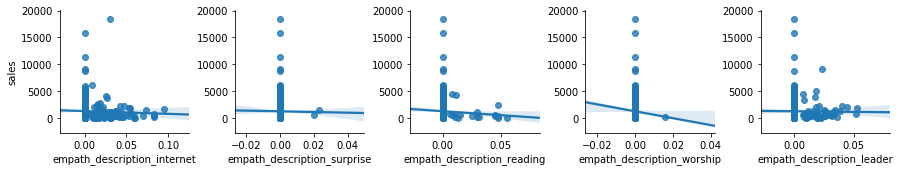

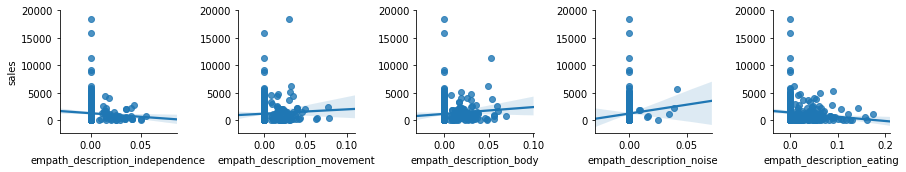

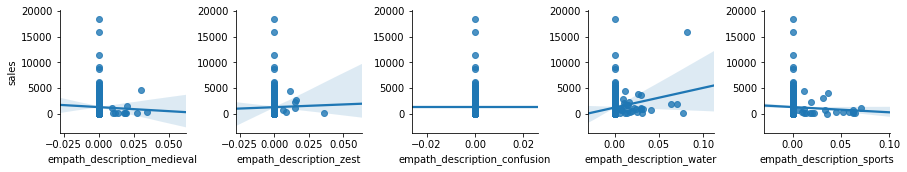

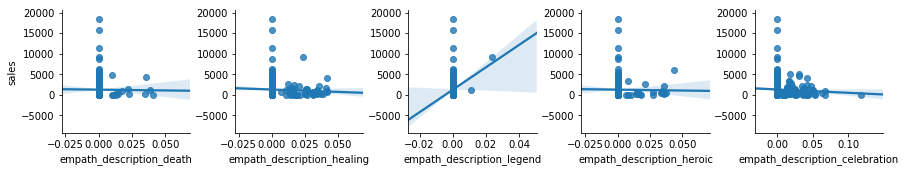

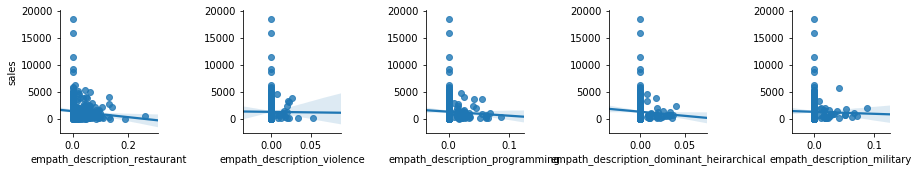

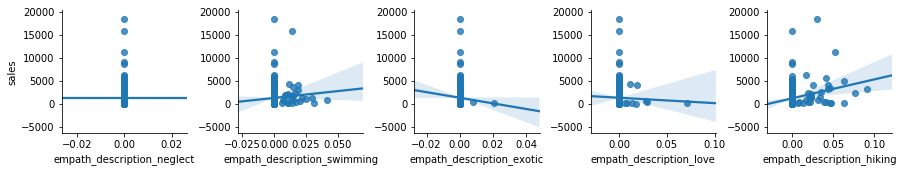

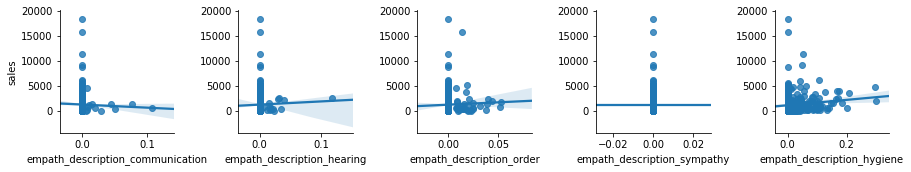

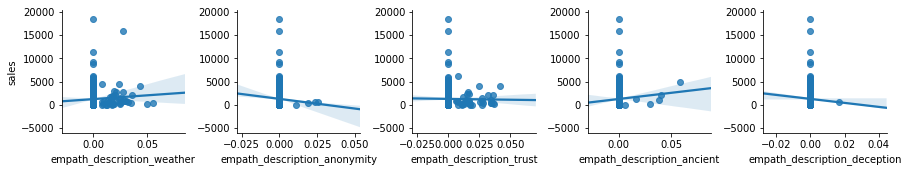

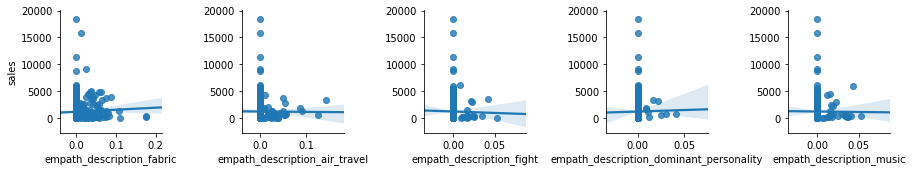

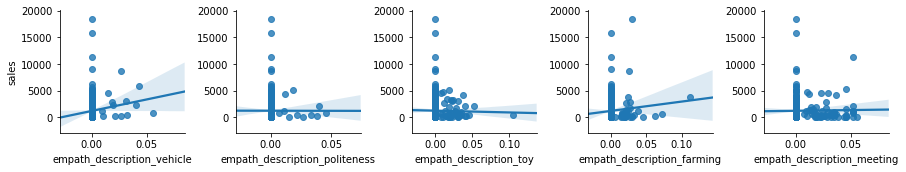

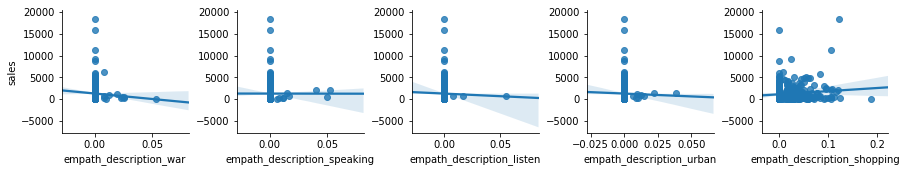

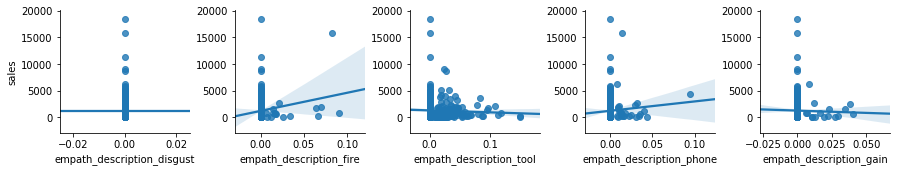

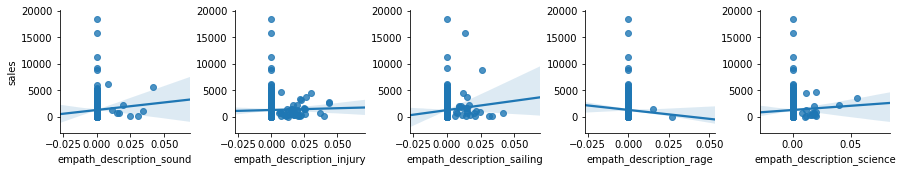

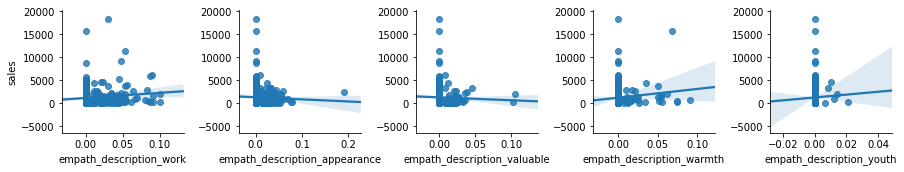

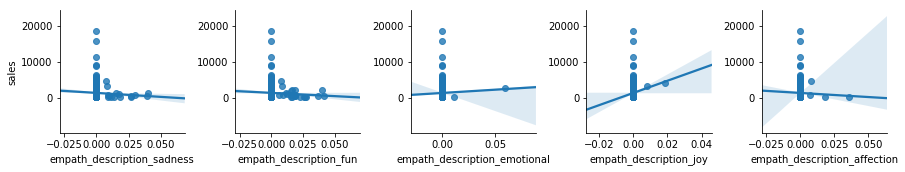

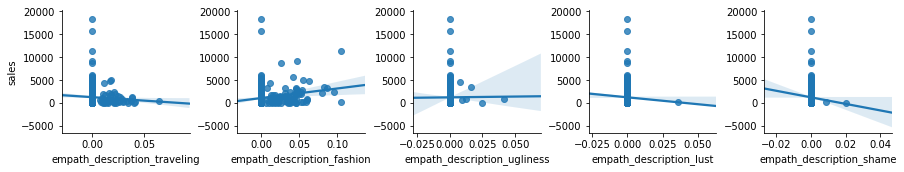

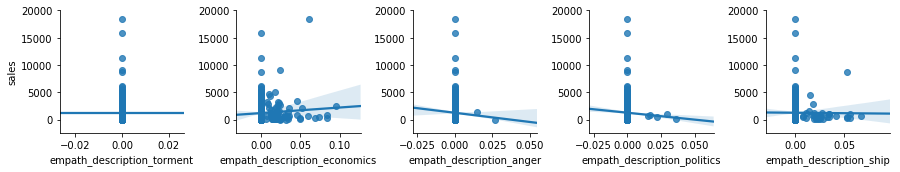

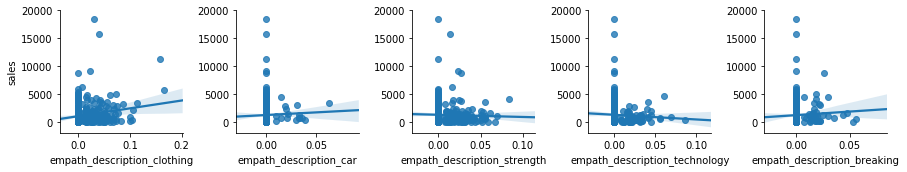

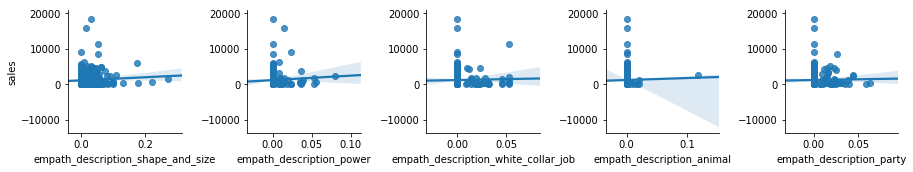

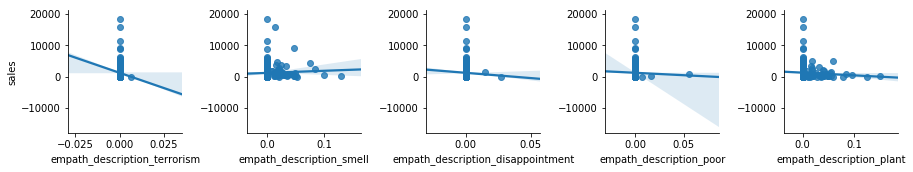

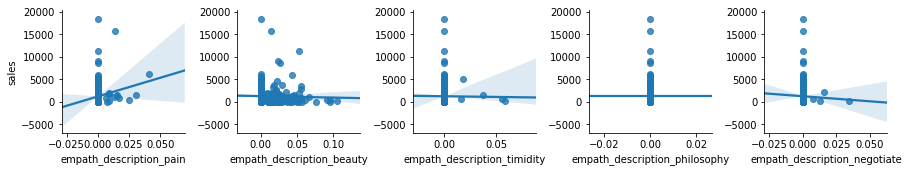

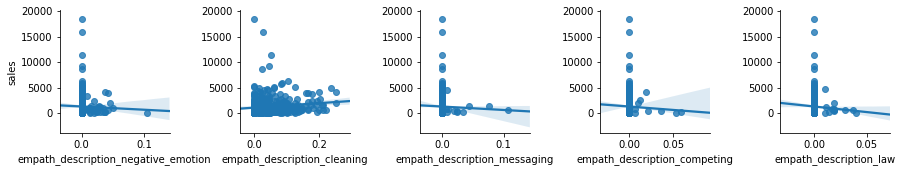

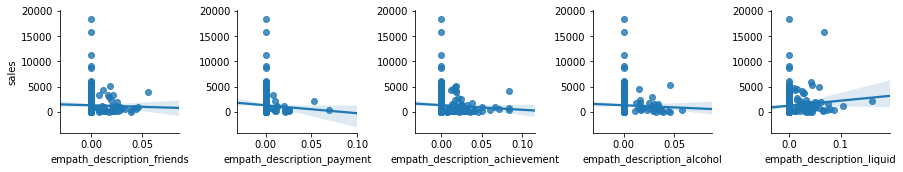

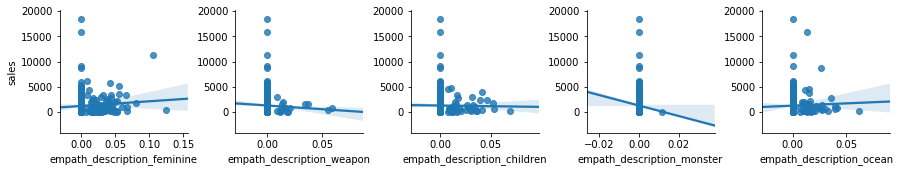

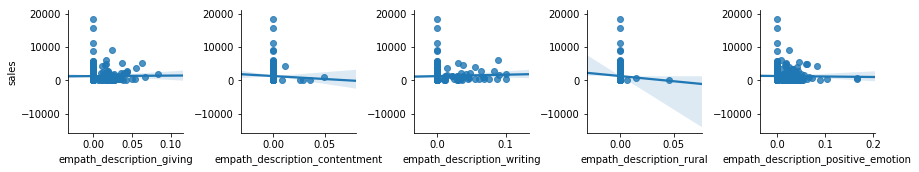

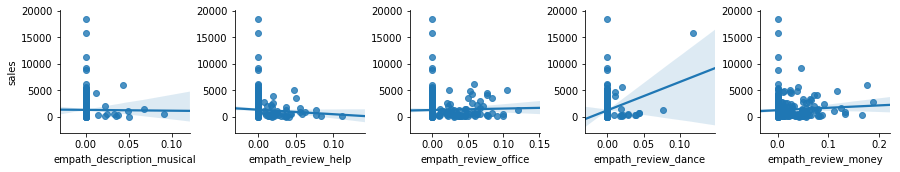

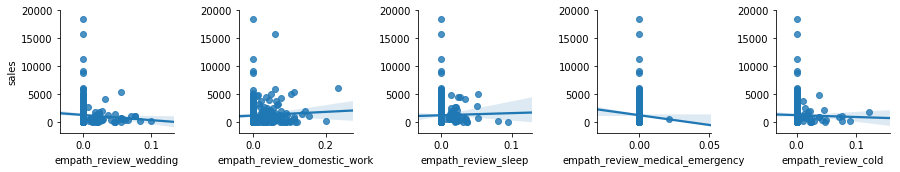

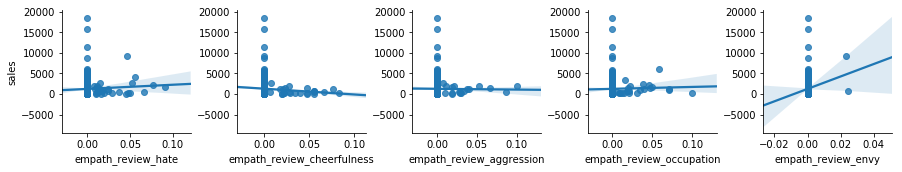

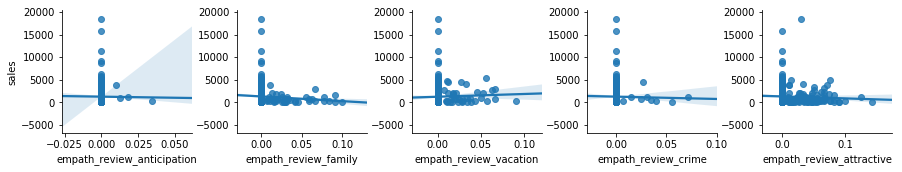

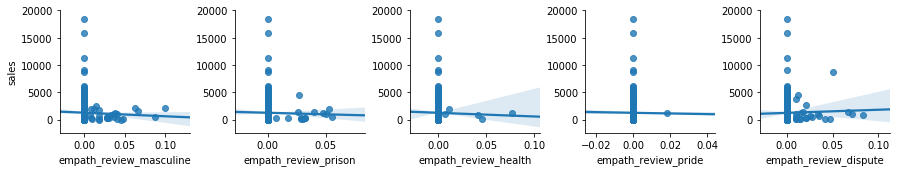

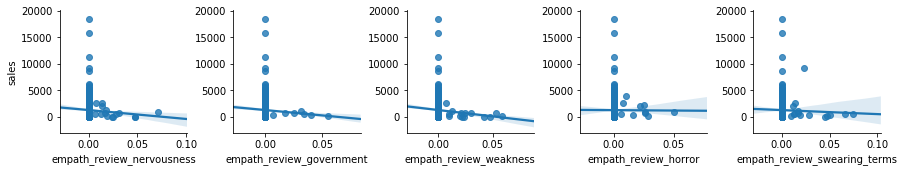

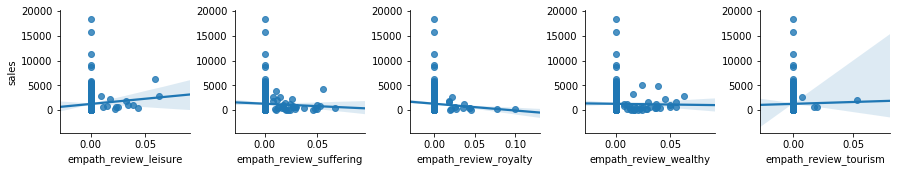

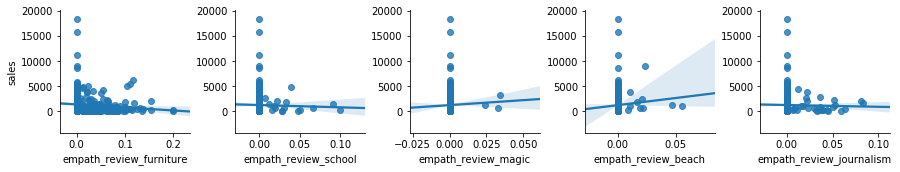

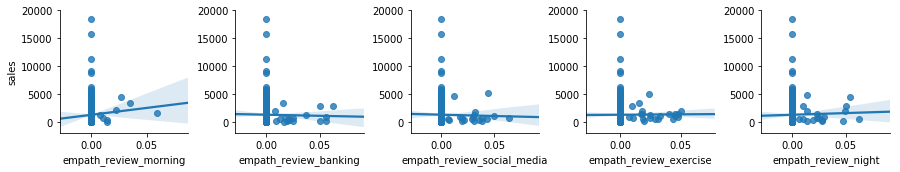

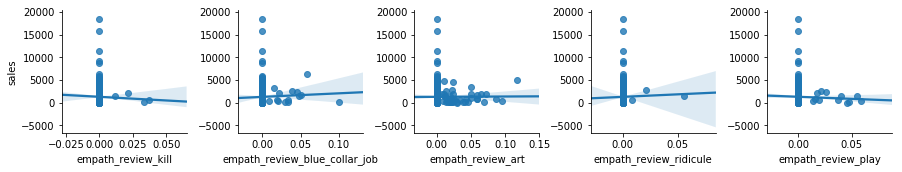

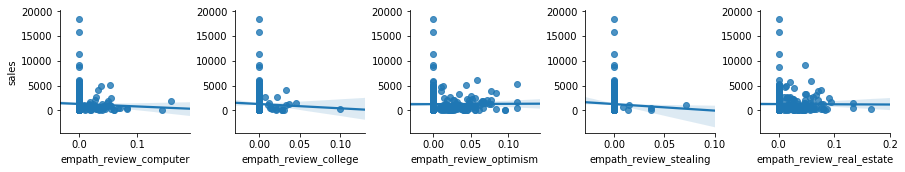

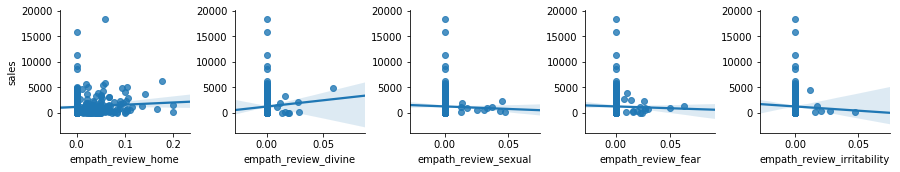

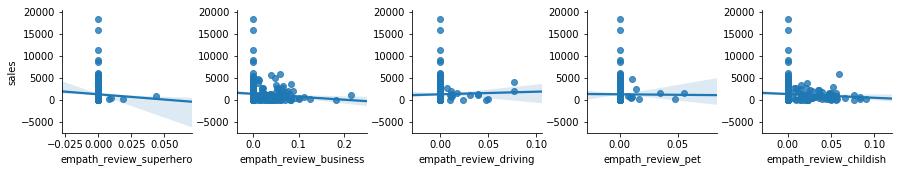

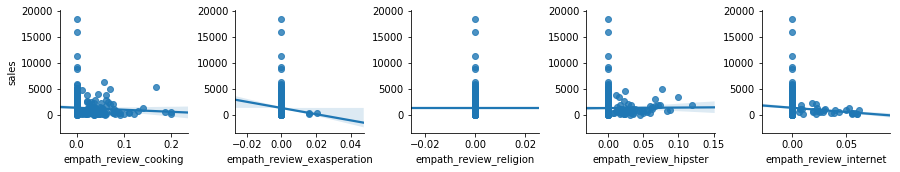

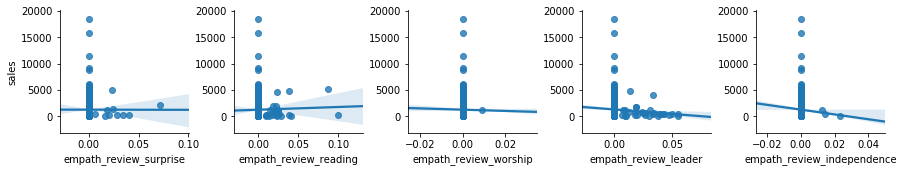

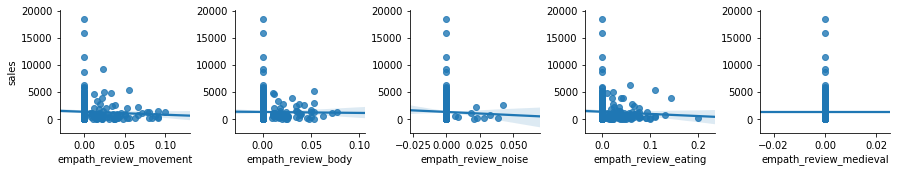

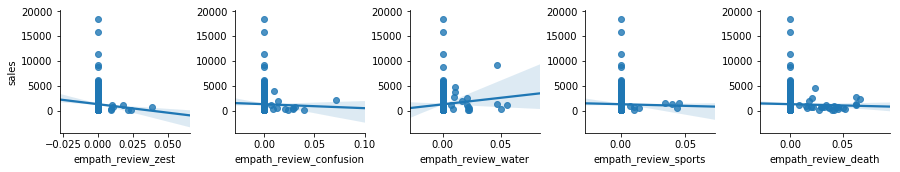

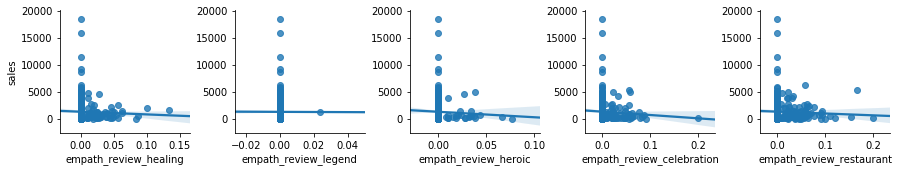

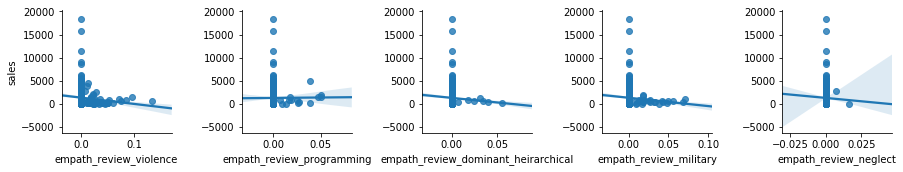

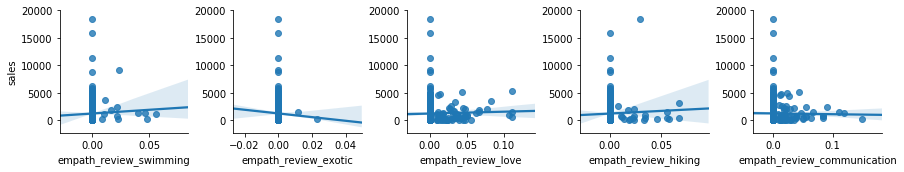

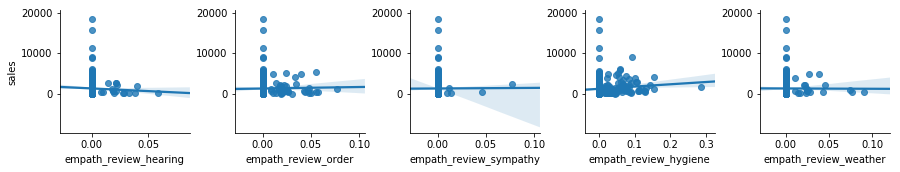

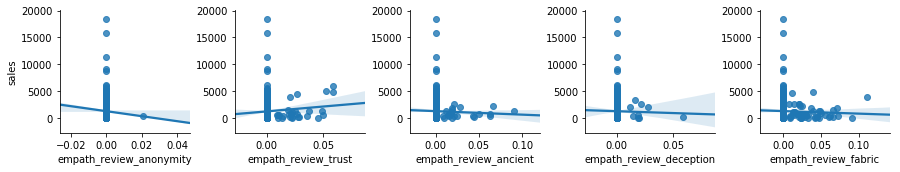

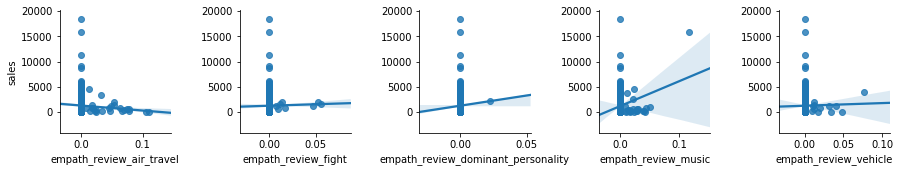

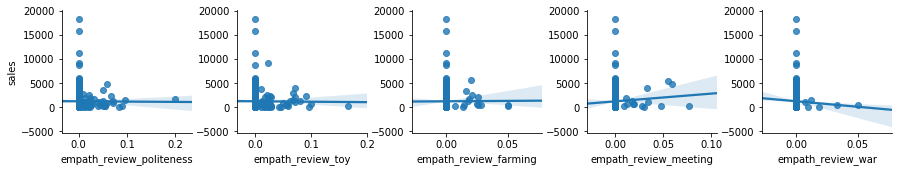

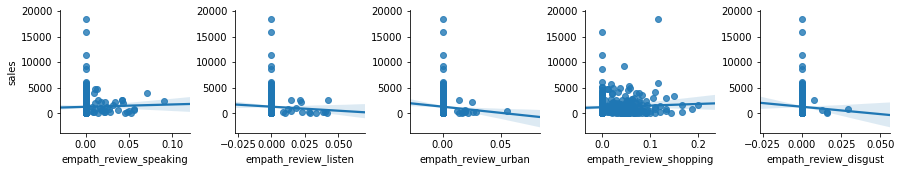

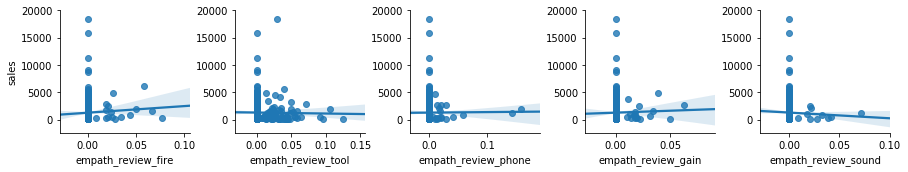

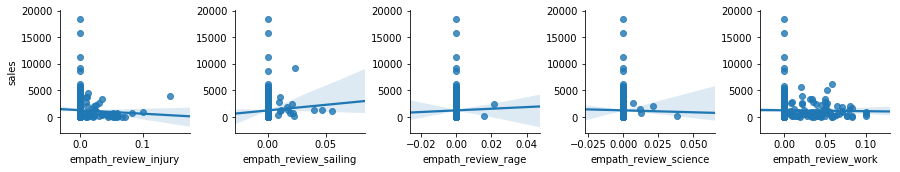

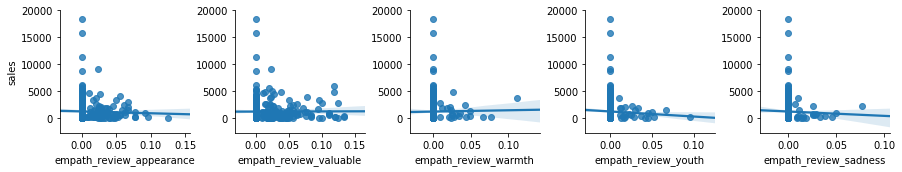

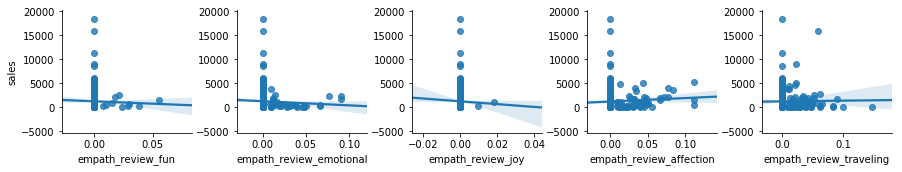

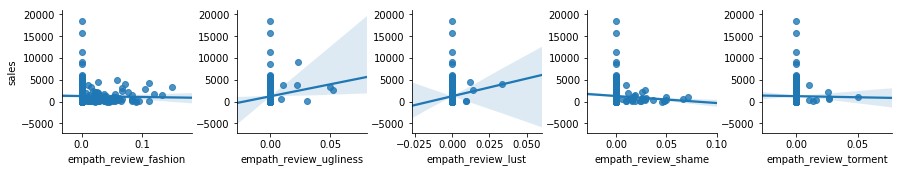

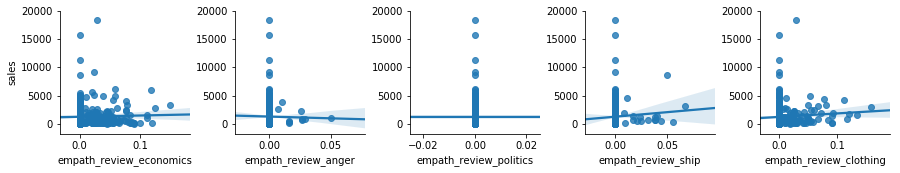

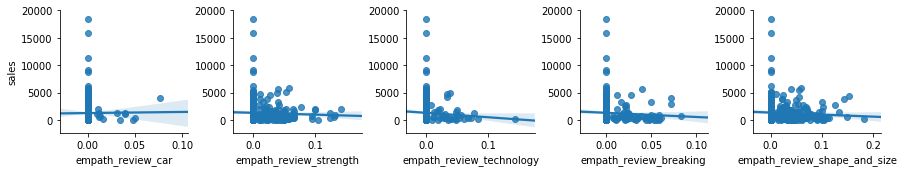

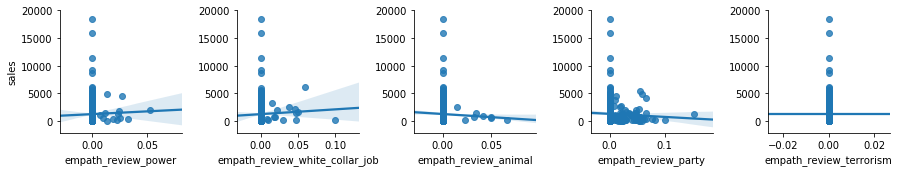

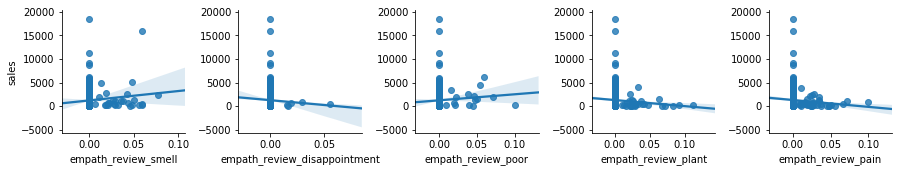

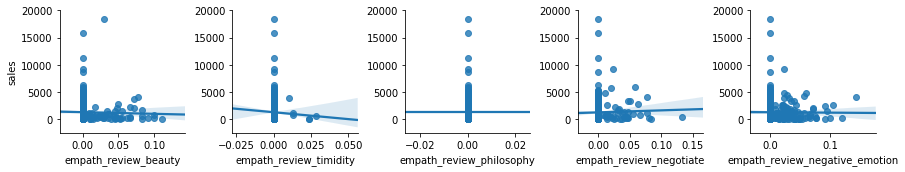

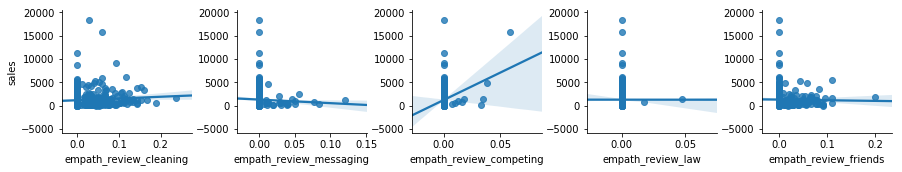

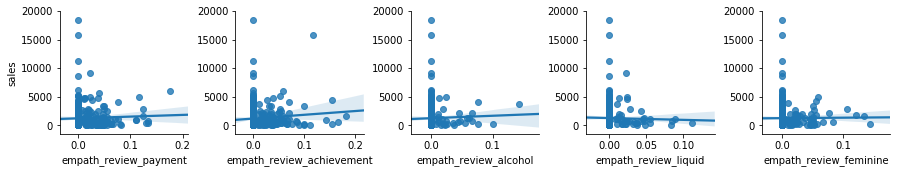

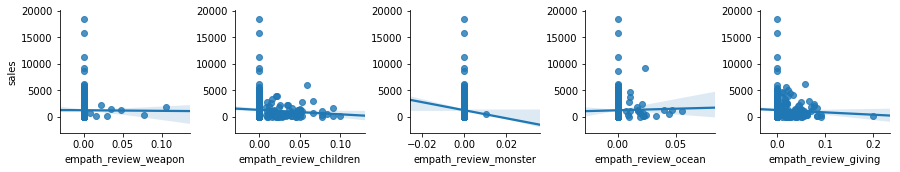

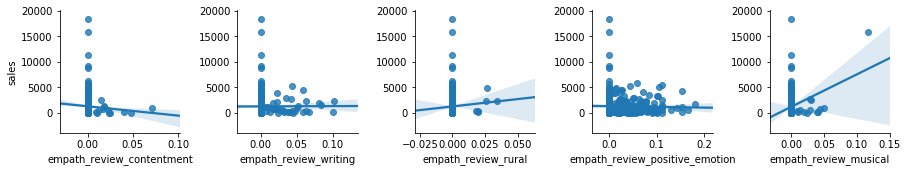

In [62]:
x_labels = []
y_label = "sales"
for c in sampleDf.columns:
    if c != "sales":
        x_labels.append(c)
i = 0
while i < len(x_labels):
    sns.pairplot(sampleDf,x_vars=x_labels[i:i+5],y_vars=y_label,kind="reg")
    i = i + 5 
plt.show()

In [63]:
y = sampleDf.loc[:, sampleDf.columns == 'sales']
x = sampleDf.loc[:, sampleDf.columns != 'sales']

In [64]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [65]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(288, 400)
(288, 1)
(97, 400)
(97, 1)


In [66]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[ 33296.65270368]
[[  2.47842780e+03  -1.37099628e+01  -2.95636227e+01   5.75765147e+00
   -5.03389629e+03  -2.99574456e+03   3.26512044e+03  -2.09726382e+02
   -3.94540170e+03  -2.84874455e+04  -2.73310737e+04  -2.26978552e+03
    1.03174862e+04  -1.92962014e+04   4.51142597e+04   5.58880067e+02
   -2.18405019e+04   1.27757554e+04   3.56019232e+03  -3.70320022e+04
    4.53927509e+04  -3.93754386e+04   4.76715589e+04   8.89314421e+04
   -3.00630076e+03   6.62057794e+03   5.23868948e-10  -1.44177691e+04
    1.15909662e+05   3.40977581e+03   4.08137717e+04  -1.33530134e+04
    7.59846176e+03   3.82310197e+04   7.51927986e+04   5.05374210e+04
   -4.52863673e+04   8.37004560e+04  -6.09507432e+04  -8.87666829e-10
    9.31322575e-10   7.54902114e+04   1.56911265e+04   1.09060989e+05
   -5.53619123e+04  -1.19902796e+05  -7.24832691e+02   6.57379870e+04
    3.83307464e+04  -1.25049495e+05  -3.72804821e+03   3.72260468e+04
   -1.11600799e+05   8.18668580e+04  -2.25598570e+03   1.55827137e+04
  

In [68]:
feature_cols = []
for col in sampleDf.columns:
    if col != 'sales':
        feature_cols.append(col)

In [69]:
# pair the feature names with the coefficients
for f,c in zip(feature_cols,list(linreg.coef_[0])):
    print(f," : ",c)

reviewPoliteness  :  2478.42780353
descriptionPoliteness  :  -13.7099628441
readabilityIndexDescription  :  -29.5636227452
readabilityIndexReview  :  5.75765146865
reviewSentimentNeg  :  -5033.89629329
reviewSentimentNeu  :  -2995.7445569
reviewSentimentPos  :  3265.12044114
reviewSentimentCom  :  -209.726381651
descriptionSentimentNeg  :  -3945.40170096
descriptionSentimentNeu  :  -28487.4455371
descriptionSentimentPos  :  -27331.0737342
descriptionSentimentCom  :  -2269.78552197
empath_description_help  :  10317.4862356
empath_description_office  :  -19296.2013887
empath_description_dance  :  45114.2597412
empath_description_money  :  558.88006719
empath_description_wedding  :  -21840.501873
empath_description_domestic_work  :  12775.7553529
empath_description_sleep  :  3560.19232041
empath_description_medical_emergency  :  -37032.0022345
empath_description_cold  :  45392.7509159
empath_description_hate  :  -39375.4385624
empath_description_cheerfulness  :  47671.5588701
empath_descr

In [70]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [71]:
# calculate RMSE metric
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

6510.31041707


In [72]:
# lasso for feature selection
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
  
names = list(sampleDf.columns)
lasso = Lasso(alpha=.3)
lasso.fit(X_train, y_train)
nameCoeffDict = {}
for n,c in zip(names, lasso.coef_):
    nameCoeffDict[n] = c

In [73]:
from collections import OrderedDict
d_sorted_by_value = OrderedDict(sorted(nameCoeffDict.items(), key=lambda x: x[1]))
good_features = []
for k, v in d_sorted_by_value.items():
    if v != 0.0:
        good_features.append(k)

In [74]:
for f in good_features:
    print(f,d_sorted_by_value[f])
len(good_features)

empath_description_rural -47849.4178086
empath_review_superhero -46917.7396334
empath_review_military -31643.5715751
empath_review_listen -24970.2583616
empath_review_pet -23623.1728145
empath_description_money -18932.6944163
empath_description_traveling -18414.7629983
empath_review_heroic -16837.3942115
empath_description_valuable -16414.6230696
empath_review_children -15601.1250899
empath_review_messaging -15120.6776229
empath_description_reading -14988.9257659
empath_description_music -14201.4917967
empath_review_journalism -13459.0083866
empath_description_computer -13363.1411382
empath_description_injury -12652.2136223
empath_review_air_travel -11901.6412697
empath_review_zest -11264.4756133
empath_review_real_estate -11018.0408335
empath_review_business -10617.0647495
empath_description_achievement -9544.28433756
empath_review_fashion -9337.28032674
empath_review_party -9037.38376042
empath_review_sadness -8532.51568685
empath_description_plant -8436.96294341
empath_description_a

153

In [75]:
X_train_2 = X_train[good_features]
X_test_2 = X_test[good_features]
# instantiate
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train_2, y_train)
# make predictions on the testing set
y_pred = linreg.predict(X_test_2)
# calculate RMSE metric
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2475.27093689


In [76]:
model.score(X_train_2, y_train)

0.78594250206833305

In [77]:
empath_feature_count = 0
non_empath_features = []
for f in good_features:
    if f.split("_")[0]=="empath":
        empath_feature_count += 1
    else:
        non_empath_features.append(f)
print(empath_feature_count,len(good_features) - empath_feature_count)

143 10


In [78]:
X_train_3 = X_train[non_empath_features]
X_test_3 = X_test[non_empath_features]
# instantiate
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train_3, y_train)
# make predictions on the testing set
y_pred = linreg.predict(X_test_3)
# calculate RMSE metric
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model.score(X_train_3, y_train)

1308.19729273


0.028098736423461723

In [79]:
# pratik edit for Odds Ratio
import numpy as np
np.exp( model.coef_ )

array([[  5.29329382e+088,   1.24378016e-176,   0.00000000e+000,
          6.77043075e-005,   6.00616279e+004,   3.56210476e-146,
          1.30503142e+169,   2.38143737e+191,   0.00000000e+000,
          7.35399200e-031]])

In [67]:
# random forest and feature selection
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(model.score(X_train, y_train))

/Users/megh/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1535.68477425
0.831657530563


In [15]:
print(model.feature_importances_)

[  3.85963181e-02   3.42219360e-03   8.96357533e-03   3.83889895e-02
   3.27957644e-03   5.60608973e-03   2.96334327e-03   2.35419709e-03
   6.93896002e-03   8.00511253e-03   2.60608994e-03   2.49206323e-03
   1.89256693e-03   1.99301134e-03   1.04393296e-04   4.17520885e-04
   2.48084283e-06   4.94238358e-03   6.96994305e-04   4.26454047e-06
   2.59835502e-04   8.81527286e-06   3.61276803e-03   4.28095348e-06
   4.64151084e-04   2.33631072e-09   0.00000000e+00   2.82247316e-04
   1.78969671e-04   1.61731389e-04   6.89711660e-04   2.01420385e-05
   4.12421339e-03   4.48602267e-06   3.19265456e-04   2.70049046e-07
   8.79072681e-05   1.69936330e-05   1.43268725e-04   0.00000000e+00
   0.00000000e+00   1.06566744e-04   5.64024768e-04   1.22878382e-03
   1.19578798e-04   2.00088615e-05   1.08698636e-03   8.23289927e-03
   1.96307575e-02   5.55445297e-05   1.45636611e-03   1.76344977e-03
   8.35402262e-05   4.56483786e-04   1.73242569e-04   3.69726875e-05
   1.28525342e-04   1.93043709e-06

In [66]:
# random forest and feature selection
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_2,y_train)
y_pred = model.predict(X_test_2)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(model.score(X_train_2, y_train))

/Users/megh/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1475.58902118
0.830944309584


In [111]:
# html img map
json_data = open('./out/cleanAsinSimilarProductsPriceBrandImageDict.json').read()
cleanAsinSimilarProductsPriceBrandImageDict = json.loads(json_data)
# image map html
# <div class="responsive">
#   <div class="gallery">
#     <a target="_blank" href="img_fjords.jpg">
#       <img src="img_fjords.jpg" alt="Trolltunga Norway" width="300" height="200">
#     </a>
#    </div>
# </div>

for asin in [*sampleDict][:50]:
    print('<div class="responsive">')
    print('<div class="gallery">')
    print('<a target="_blank" href="#">')
    print('<img src="',cleanAsinSimilarProductsPriceBrandImageDict[asin]['imUrl'],'" alt="Trolltunga Norway" width="100" height="100">')
    print('</a>')
    print('</div>')
    print('</div>')